=== Evaluasi Model Decision Tree ===
Mean Squared Error (MSE): 0.3628607532467535
R-squared (R²): 0.996518733897193


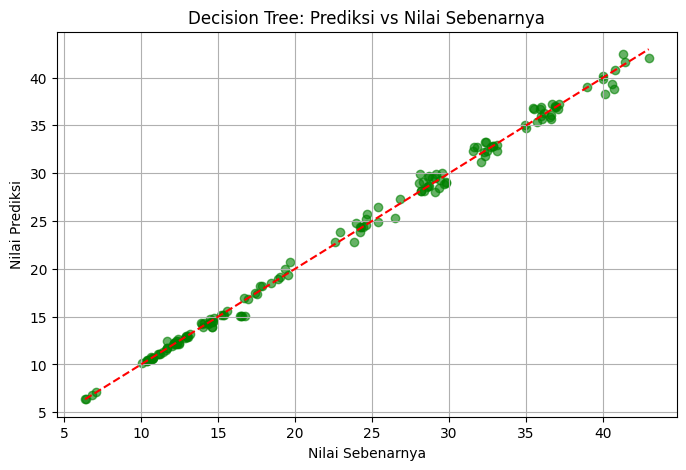

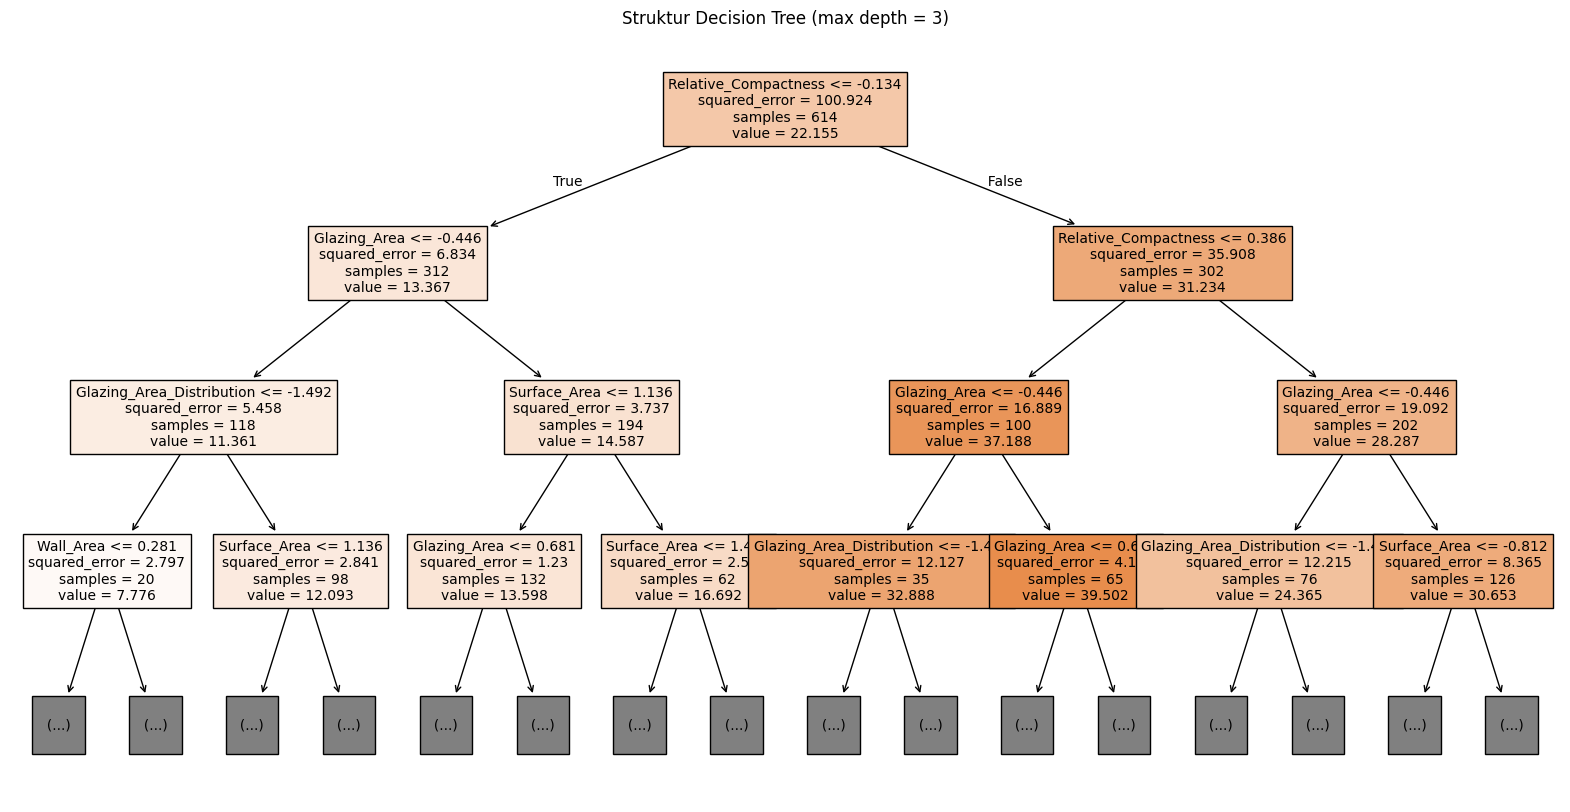

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load dataset dari UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)

# 2. Rename kolom agar mudah diakses
data.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
                'Overall_Height', 'Orientation', 'Glazing_Area',
                'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']

# 3. Pisahkan fitur dan target (target = Heating_Load)
X = data.iloc[:, :-2]
y = data['Heating_Load']

# 4. Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split data ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 6. Buat dan latih model Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# 7. Prediksi dan evaluasi
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Evaluasi Model Decision Tree ===")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# 8. Visualisasi: Prediksi vs Nilai Sebenarnya
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Nilai Prediksi")
plt.title("Decision Tree: Prediksi vs Nilai Sebenarnya")
plt.grid(True)
plt.show()

# 9. Visualisasi Struktur Tree (dalamnya dibatasi supaya terlihat jelas)
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, max_depth=3, fontsize=10)
plt.title("Struktur Decision Tree (max depth = 3)")
plt.show()
